<a href="https://colab.research.google.com/github/scativa/IV-Colab/blob/evi/Cachaduras_07_28_25_segmentation_pretrained_efficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

##functions.py
Reemplaza la línea `import functions as func`

In [1]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def load_images(dir, norm=False):
    images = [cv2.imread(os.path.join(dir, filename)).astype(np.float32)
            for filename in os.listdir(dir)
            if cv2.imread(os.path.join(dir, filename)) is not None]
    if norm:
        images = [image / 255.0 for image in images]

    # https://chatgpt.com/c/67fd5724-8164-8006-9367-780189493ee5
    images = [cv2.resize(image, (224, 224)).astype(np.float32) for image in images]
    return images

def load_masks(dir_pores, image_filenames):
    masks = []
    for filename in image_filenames:
        mask_path = os.path.join(dir_pores, filename)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE).astype(np.float32)

        # Normalizar
        mask = mask / 255.0

        # Redimensionar
        mask = cv2.resize(mask, (224, 224))

        # Binarizar DESPUÉS del resize
        mask = (mask > 0.5).astype(np.float32)

        masks.append(mask)

    return masks
'''def load_masks(dir_pores, image_filenames):
    masks = [
            cv2.imread(os.path.join(dir_pores, filename), cv2.IMREAD_GRAYSCALE).astype(np.float32)
            # if os.path.exists(os.path.join(dir_pores, filename))
            # else np.zeros((232, 180), dtype=np.float32)
            for filename in image_filenames
    ]
    # masks = [np.expand_dims(mask, axis=-1) for mask in masks] #adds a channel dimension to the masks

    # https://chatgpt.com/c/67fd5724-8164-8006-9367-780189493ee5
    masks = [cv2.resize(mask, (224, 224)).astype(np.float32) for mask in masks]

    return masks'''

# just to plot masks
def plot_img_mask(img, mask, pred):

    sub_plot = 0
    num_cols = 0

    # Determina el número de columnas en función de si hay una predicción
    if img is not None:
        num_cols += 1
    if mask is not None:
        num_cols += 1
    if pred is not None:
        num_cols += 1

    # Si no hay nada para mostrar, sal de la función
    if num_cols == 0:
        print("No hay nada para mostrar.")
        return

    # Crea la figura y los ejes en una sola fila con el número determinado de columnas
    fig, axes = plt.subplots(1, num_cols, figsize=(3, 3))

    if (img is not None):
      axes[sub_plot].imshow(img)
      axes[sub_plot].set_title('Image')
      axes[sub_plot].axis('off')
      sub_plot += 1

    if (mask is not None):
      axes[sub_plot].imshow(mask, cmap='gray')
      axes[sub_plot].set_title('Mask')
      axes[sub_plot].axis('off')
      sub_plot += 1

    if (pred is not None):
      pred_mask = np.where(pred <= 0.5, 0, 1)

      axes[sub_plot].imshow(pred_mask, cmap='gray')
      axes[sub_plot].set_title('Predicted')
      axes[sub_plot].axis('off')

    plt.tight_layout()
    plt.show()

def augmented_dataset(dir_images, dir_mask, seed, norm):
    # From "Pores 03/28/25 -Seba- Basado en segmentation_own (DTE_fisuras).ipynb"


    images = load_images(dir_images, norm)
    # Get image filenames from loaded images

    image_filenames = [os.path.basename(image_path) for image_path in os.listdir(dir_images)]
    # masks = load_masks(dir_pores)
    masks = load_masks(dir_mask, image_filenames)


    X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=seed)

    X_train[0].shape
    y_train[0].shape
    augmented_X_train = [cv2.flip(i, 1) for i in X_train]
    augmented_y_train = [cv2.flip(i, 1) for i in y_train]

    X_train = np.array(X_train + augmented_X_train)
    y_train = np.array(y_train + augmented_y_train)

    X_test = np.array(X_test)
    y_test = np.array(y_test)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

    y_train = np.expand_dims(y_train, axis=-1)
    y_val = np.expand_dims(y_val, axis=-1)
    y_test = np.expand_dims(y_test, axis=-1)

    return X_train, y_train, X_val, y_val, X_test, y_test

def test_dataset(dir_images, dir_mask, seed, norm):
    # From "Pores 03/28/25 -Seba- Basado en segmentation_own (DTE_fisuras).ipynb"


    images = load_images(dir_images, norm)
    # Get image filenames from loaded images

    image_filenames = [os.path.basename(image_path) for image_path in os.listdir(dir_images)]
    # masks = load_masks(dir_pores)
    masks = load_masks(dir_mask, image_filenames)


    _, X_test, _, y_test = train_test_split(images, masks, test_size=0.2, random_state=seed)

    y_test = np.expand_dims(y_test, axis=-1)

    return X_test, y_test

'''
If you want to show some other metrics, just uncomment
'''
def plot_history(history, x_lim, y_lim):
    #val_iou_score = history.history['val_iou_score']
    #iou_score = history.history['iou_score']
    val_f1_score = history.history['val_f1-score']
    #f1_score = history.history['f1-score']
    val_loss = history.history['val_loss']
    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)

    # Plotting
    plt.figure(figsize=(12, 6))

    #plt.plot(epochs, val_iou_score, 'b', label='Validation IoU Score')
    #plt.plot(epochs, iou_score, 'g', label='IoU Score')
    #plt.plot(epochs, f1_score, 'r', label='F1 Score')
    plt.plot(epochs, val_f1_score, 'c', label='Validation F1 Score')
    plt.plot(epochs, val_loss, 'm', label='Validation Loss')
    plt.plot(epochs, loss, 'y', label='Training Loss')

    plt.title('Training Metrics', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Score/Loss', fontsize=14)
    plt.legend(fontsize=12)

    plt.grid(True)
    plt.xlim(1, x_lim)
    plt.ylim(0, y_lim)
    plt.show()



#Entorno

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from time import process_time_ns
import os, json

usr_drive = "evi.cnea"


base_paths = { # Path al
    "ppca.cnea": '/content/drive/MyDrive/IV',
    "seba.cnea": '/content/drive/MyDrive/CNEA/DCA/Proyectos/IV - Inspección Visual/IV',
    "scativa": '/content/drive/MyDrive/Laburo/CNEA/DCA/Proyectos/IV - Inspección Visual/IV',
    "evi.cnea": '/content/drive/MyDrive/IV',
    "evi55": '/content/drive/MyDrive/IV'
}
# base_path =
base_path = base_paths[usr_drive]

if not os.path.exists(base_path):
  print(f'Carpeta inexistente "{usr_drive}: {base_path}"')
else:
  print(f'Utilizando carpeta  "{usr_drive}: {base_path}"')


#import tensorflow as tf
# Setting GPU memory growth to True
#gpus = tf.config.experimental.list_physical_devices('GPU')
#if gpus:
#    print(f"GPUs detected: {gpus}")
#    try:
#        for gpu in gpus:
#            tf.config.experimental.set_memory_growth(gpu, True)
#    except RuntimeError as e:
#        print(e)


os.environ["SM_FRAMEWORK"] = "tf.keras"
from tensorflow import keras
from keras import backend as K


Utilizando carpeta  "evi.cnea: /content/drive/MyDrive/IV"


In [4]:
!pip install segmentation-models
import segmentation_models as sm
from segmentation_models import get_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.9 MB/s eta 0:00:00
Segmentation Models: using `tf.keras` framework.


#Dataset

In [5]:
defect = 'cachaduras' #'cachaduras'
image_directory = f'{base_path}/pellets'
masks_directory = f'{base_path}/Output_052025 (máscaras actualizadas)/all_{defect}'

if not os.path.exists(image_directory):
  print(f'Carpeta inexistente "{usr_drive}: {base_path}"')
else:
  print(f'Utilizando carpeta  "{usr_drive}: {base_path}"')

if not os.path.exists(masks_directory):
  print(f'Carpeta inexistente "{usr_drive}: {base_path}"')
else:
  print(f'Utilizando carpeta  "{usr_drive}: {base_path}"')

Utilizando carpeta  "evi.cnea: /content/drive/MyDrive/IV"
Utilizando carpeta  "evi.cnea: /content/drive/MyDrive/IV"


In [6]:
import numpy as np
import os


# === MODO DE EJECUCIÓN ===
# Usar 'cargar' para usar los datos ya procesados guardados (.npy)
# Usar 'generar' para crear nuevos datos y guardarlos a partir de las imágenes originales
modo = 'cargar'

# === Rutas ===
save_dir = f'{base_path}/processed_data_{defect}'
os.makedirs(save_dir, exist_ok=True)

# Add a check to see if the directory exists after creation attempt
if not os.path.exists(save_dir):
    print(f"❌ Error: The directory {save_dir} could not be created or accessed.")
else:
    print(f"✅ Directory {save_dir} confirmed to exist.")


# === Cargar o generar los datos ===
if modo == 'cargar':
    print("Cargando datos preprocesados desde archivos .npy...")
    X_train = np.load(os.path.join(save_dir, 'X_train.npy'))
    X_val   = np.load(os.path.join(save_dir, 'X_val.npy'))
    X_test  = np.load(os.path.join(save_dir, 'X_test.npy'))
    y_train = np.load(os.path.join(save_dir, 'y_train.npy'))
    y_val   = np.load(os.path.join(save_dir, 'y_val.npy'))
    y_test  = np.load(os.path.join(save_dir, 'y_test.npy'))
    print("✅ Datos cargados correctamente.")

elif modo == 'generar':
    print("Generando nuevos datos a partir de imágenes y máscaras...")
    X_train, y_train, X_val, y_val, X_test, y_test = augmented_dataset(
        image_directory, masks_directory, seed=42, norm=False
    )

    # Guardar los datos generados
    np.save(os.path.join(save_dir, 'X_train.npy'), X_train)
    np.save(os.path.join(save_dir, 'X_val.npy'),   X_val)
    np.save(os.path.join(save_dir, 'X_test.npy'),  X_test)
    np.save(os.path.join(save_dir, 'y_train.npy'), y_train)
    np.save(os.path.join(save_dir, 'y_val.npy'),   y_val)
    np.save(os.path.join(save_dir, 'y_test.npy'),  y_test)

    print(f"✅ Nuevos datos generados y guardados en {save_dir}")

else:
    raise ValueError("❌ Modo inválido. Usa 'cargar' o 'generar'.")

✅ Directory /content/drive/MyDrive/IV/processed_data_cachaduras confirmed to exist.
Cargando datos preprocesados desde archivos .npy...
✅ Datos cargados correctamente.


Train:  1920 1920
Test:  300 300
Val:  480 480


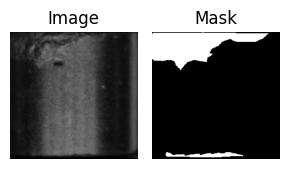

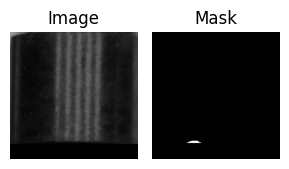

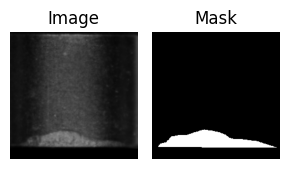

Train:  <class 'numpy.ndarray'> input range:  0.0 215.04784
Val:  <class 'numpy.ndarray'> input range:  0.0 201.98215
Test:  <class 'numpy.ndarray'> input range:  0.0 215.41821


In [7]:
# Muestra de imagenes y máscaras cargadas

import random

print("Train: ", len(X_train), len(y_train))
print("Test: ", len(X_test), len(y_test))
print("Val: ", len(X_val), len(y_val))

pos = random.randint(0, len(X_train))
plot_img_mask(np.int64(X_train[pos]), y_train[pos], None)

pos = random.randint(0, len(X_test))
plot_img_mask(np.int64(X_test[pos]), y_test[pos], None)

pos = random.randint(0, len(X_val))
plot_img_mask(np.int64(X_val[pos]), y_val[pos], None)

print("Train: ", type(X_train), 'input range: ', np.min(X_train), np.max(X_train))
print("Val: ", type(X_val), 'input range: ', np.min(X_val), np.max(X_val))
print("Test: ", type(X_test), 'input range: ', np.min(X_test), np.max(X_test))


#Definición del modelo y preprocesamiento de data

In [8]:
model_type = "efficientnetb2"
# "resnet152" "efficientnetb2" "vgg19"
print(f'Cargando modelo: {model_type}')


preprocessed_input = get_preprocessing(model_type)

# Preprocesar las imágenes
X_train_preprocessed = preprocessed_input(np.copy(X_train))
X_val_preprocessed = preprocessed_input(np.copy(X_val))
X_test_preprocessed = preprocessed_input(np.copy(X_test))

print("Train: ", type(X_train_preprocessed), 'input range: ', np.min(X_train_preprocessed), np.max(X_train_preprocessed))
print("Val: ", type(X_val_preprocessed), 'input range: ', np.min(X_val_preprocessed), np.max(X_val_preprocessed))
print("Test: ", type(X_test_preprocessed), 'input range: ', np.min(X_test_preprocessed), np.max(X_test_preprocessed))



Cargando modelo: efficientnetb2
Train:  <class 'numpy.ndarray'> input range:  -2.117904 1.9436661
Val:  <class 'numpy.ndarray'> input range:  -2.117904 1.7159415
Test:  <class 'numpy.ndarray'> input range:  -2.117904 1.9501214


In [9]:
print("Unique y_train values:", np.unique(y_train))
print("Unique y_val values:", np.unique(y_val))

Unique y_train values: [0. 1.]
Unique y_val values: [0. 1.]


#Entrenamiento

In [10]:
import os
import pickle
import numpy as np
import pandas as pd
from datetime import datetime
import tensorflow as tf
import segmentation_models as sm
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback

print(f"🔧 Usando modelo: {model_type}")

# === Registro para serialización ===
@tf.keras.utils.register_keras_serializable(package="Custom")
def custom_bce_dice_loss(y_true, y_pred):
    return sm.losses.bce_dice_loss(y_true, y_pred)

@tf.keras.utils.register_keras_serializable(package="Custom")
def custom_iou_score(y_true, y_pred):
    return sm.metrics.iou_score(y_true, y_pred)

@tf.keras.utils.register_keras_serializable(package="Custom")
def custom_f1_score(y_true, y_pred):
    return sm.metrics.f1_score(y_true, y_pred)

# === 2. Rutas ===
checkpoint_path = f"{base_path}/model/checkpoints_{model_type}_{defect}/{model_type}_last.keras"
history_pkl_path = f"{base_path}/model/checkpoints_{model_type}_{defect}/{model_type}_history.pkl"
history_csv_path = f"{base_path}/model/checkpoints_{model_type}_{defect}/{model_type}_history.csv"
out_folder = f"{base_path}/output/model_{defect}"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)
os.makedirs(out_folder, exist_ok=True)

# === 3. Callback mejorado para guardar historial .pkl y actualizar .csv ===
class HistorySaver(Callback):
    def __init__(self, pkl_path, csv_path):
        super().__init__()
        self.pkl_path = pkl_path
        self.csv_path = csv_path

        # Cargar historial CSV existente si hay
        if os.path.exists(csv_path):
            self.df_history = pd.read_csv(csv_path, index_col="epoch")
        else:
            self.df_history = pd.DataFrame()

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        new_row = pd.DataFrame([logs], index=[epoch])
        new_row.index.name = 'epoch'

        # Agregar nueva fila al historial existente
        self.df_history = pd.concat([self.df_history, new_row])
        self.df_history = self.df_history[~self.df_history.index.duplicated(keep='last')]
        self.df_history.sort_index(inplace=True)

        # Guardar como CSV
        self.df_history.to_csv(self.csv_path)
        print(f"📝 CSV actualizado hasta época {epoch + 1}")

        # También guardar como .pkl para reanudar
        with open(self.pkl_path, 'wb') as f:
            pickle.dump(self.df_history.to_dict(orient='list'), f)

# === 4. Función para verificar historial válido ===
def valid_history(hist):
    return (
        isinstance(hist, dict) and
        'loss' in hist and
        isinstance(hist['loss'], list) and
        len(hist['loss']) > 0
    )

'''# === 5. Cargar o crear modelo ===
if os.path.exists(checkpoint_path):
    print(f"🔁 Cargando modelo completo desde: {checkpoint_path}")
    model = tf.keras.models.load_model(
        checkpoint_path,
        custom_objects={
            'custom_bce_dice_loss': custom_bce_dice_loss,
            'custom_iou_score': custom_iou_score,
            'custom_f1_score': custom_f1_score
        }
    )
else:
    print("🆕 Creando nuevo modelo...")
    model = sm.Unet(
        backbone_name=model_type,
        classes=1,
        activation='sigmoid',
        encoder_weights='imagenet'
    )
    model.compile(
        optimizer='Adam',
        loss=custom_bce_dice_loss,
        metrics=[custom_iou_score, custom_f1_score]
    )'''

# === 5. Cargar o crear modelo ===
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)
print(f"Attempting to load model from: {checkpoint_path}")

if os.path.exists(checkpoint_path):
    print(f"🔁 Cargando modelo completo desde: {checkpoint_path}")
    model = tf.keras.models.load_model(
        checkpoint_path,
        custom_objects={
            'custom_bce_dice_loss': custom_bce_dice_loss,
            'custom_iou_score': custom_iou_score,
            'custom_f1_score': custom_f1_score
        }
    )
else:
    print("🆕 Creando nuevo modelo...")
    model = sm.Unet(
        backbone_name=model_type,
        classes=1,
        activation='sigmoid',
        encoder_weights='imagenet'
    )
    model.compile(
        optimizer='Adam',
        loss=custom_bce_dice_loss,
        metrics=[custom_iou_score, custom_f1_score]
    )

# === 6. Cargar historial si existe ===
if os.path.exists(history_pkl_path):
    with open(history_pkl_path, 'rb') as f:
        previous_history = pickle.load(f)
    if valid_history(previous_history):
        print(f"📈 Historial cargado con {len(previous_history['loss'])} épocas.")
    else:
        previous_history = None
        os.remove(history_pkl_path)
        print("⚠️ Historial inválido. Se iniciará desde cero.")
else:
    previous_history = None
    print("📉 No se encontró historial previo.")

initial_epoch = len(previous_history['loss']) if previous_history else 0

# === 7. Entrenamiento ===
batch_size = 16
epochs = 500


callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint(
        filepath=checkpoint_path,
        save_best_only=False,
        save_weights_only=False  # ✅ Guarda modelo completo (.keras)
    ),
    HistorySaver(history_pkl_path, history_csv_path)
]

'''callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, save_best_only=False),
    HistorySaver(history_pkl_path, history_csv_path)
]'''

history = model.fit(
    x=X_train_preprocessed,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    initial_epoch=initial_epoch,
    validation_data=(X_val_preprocessed, y_val),
    callbacks=callbacks
)

# === 8. Guardar modelo final completo ===
now = datetime.now().strftime("%Y%m%d_%H%M%S")
final_model_path = f'{out_folder}/{now}-{model_type}-{defect}.keras'
model.save(final_model_path)
print(f"✅ Modelo final guardado: {final_model_path}")

# === 9. Evaluación ===
print("\n📊 Validación:")
model.evaluate(X_val_preprocessed, y_val)

print("\n📊 Test:")
model.evaluate(X_test_preprocessed, y_test)

# === 10. Predicción ===
pred = model.predict(X_test_preprocessed)


🔧 Usando modelo: efficientnetb2
Attempting to load model from: /content/drive/MyDrive/IV/model/checkpoints_efficientnetb2_cachaduras/efficientnetb2_last.keras
🆕 Creando nuevo modelo...
31936256/31936256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
📉 No se encontró historial previo.
Epoch 1/500
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - custom_f1_score: 0.1986 - custom_iou_score: 0.1250 - loss: 1.0128📝 CSV actualizado hasta época 1
120/120 ━━━━━━━━━━━━━━━━━━━━ 158s 315ms/step - custom_f1_score: 0.2000 - custom_iou_score: 0.1259 - loss: 1.0107 - val_custom_f1_score: 0.3767 - val_custom_iou_score: 0.2395 - val_loss: 0.7231
Epoch 2/500
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - custom_f1_score: 0.5891 - custom_iou_score: 0.4302 - loss: 0.4666📝 CSV actualizado hasta época 2
120/120 ━━━━━━━━━━━━━━━━━━━━ 29s 244ms/step - custom_f1_score: 0.5890 - custom_iou_score: 0.4301 - loss: 0.4667 - val_custom_f1_score: 0.5060 - val_custom_iou_score: 0.3523 - val_loss: 0.5774
Epoch 3/500
120/120 ━━━━━━━━━━━━━━━━

In [11]:
import matplotlib.pyplot as plt
import os
import numpy as np

# === 1. Generar predicciones (si no lo hiciste ya) ===
y_pred = model.predict(X_test_preprocessed)

# Define the base directory for output and predictions
output_dir = f"{base_path}/output"
predictions_dir = os.path.join(output_dir, f"predictions_{defect}_{model_type}")
results_dir = os.path.join(predictions_dir, f"visualizations_{defect}_{model_type}") # Keep visualization directory as before

# Create the necessary directories if they don't exist
os.makedirs(predictions_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

# === 2. Guardar predicciones como .npy ===
np.save(os.path.join(predictions_dir, "y_pred_test.npy"), y_pred)
print("✅ Predicciones guardadas.")

# === 3. Visualizar y guardar comparaciones ===
# Escala las máscaras para visualización (umbral opcional)
threshold = 0.5
y_pred_bin = (y_pred > threshold).astype(np.uint8)

# Iterar sobre algunas muestras (puedes limitar si es mucho)
for i in range(len(X_test)):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    original_image_display = np.clip(X_test[i], 0, 255).astype(np.uint8)



    # Imagen original
    axes[0].imshow(original_image_display)
    axes[0].set_title("Imagen original")
    axes[0].axis("off")

    # Ground truth
    axes[1].imshow(y_test[i].squeeze(), cmap='gray')
    axes[1].set_title("Máscara Real")
    axes[1].axis("off")

    # Predicción
    axes[2].imshow(y_pred_bin[i].squeeze(), cmap='gray')
    axes[2].set_title("Predicción")
    axes[2].axis("off")

    plt.tight_layout()
    save_path = os.path.join(results_dir, f"test_{i:03d}.png")
    plt.savefig(save_path)
    plt.close()

print(f"🖼️ Visualizaciones guardadas en: {results_dir}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step
✅ Predicciones guardadas.
🖼️ Visualizaciones guardadas en: /content/drive/MyDrive/IV/output/predictions_cachaduras_efficientnetb2/visualizations_cachaduras_efficientnetb2


In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_history(history, x_lim, y_lim):
    #val_iou_score = history.history['val_iou_score']
    #iou_score = history.history['iou_score']
    val_f1_score = history.history['val_custom_f1_score']
    f1_score = history.history['custom_f1_score']
    val_loss = history.history['val_loss']
    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)

    # Plotting
    plt.figure(figsize=(12, 6))

    #plt.plot(epochs, val_iou_score, 'b', label='Validation IoU Score')
    #plt.plot(epochs, iou_score, 'g', label='IoU Score')
    plt.plot(epochs, f1_score, 'r', label='F1 Score')
    plt.plot(epochs, val_f1_score, 'c', label='Validation F1 Score')
    plt.plot(epochs, val_loss, 'm', label='Validation Loss')
    plt.plot(epochs, loss, 'y', label='Training Loss')

    plt.title('Training Metrics', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Score/Loss', fontsize=14)
    plt.legend(fontsize=12)

    plt.grid(True)
    plt.xlim(1, x_lim)
    plt.ylim(0, y_lim)
    plt.show()

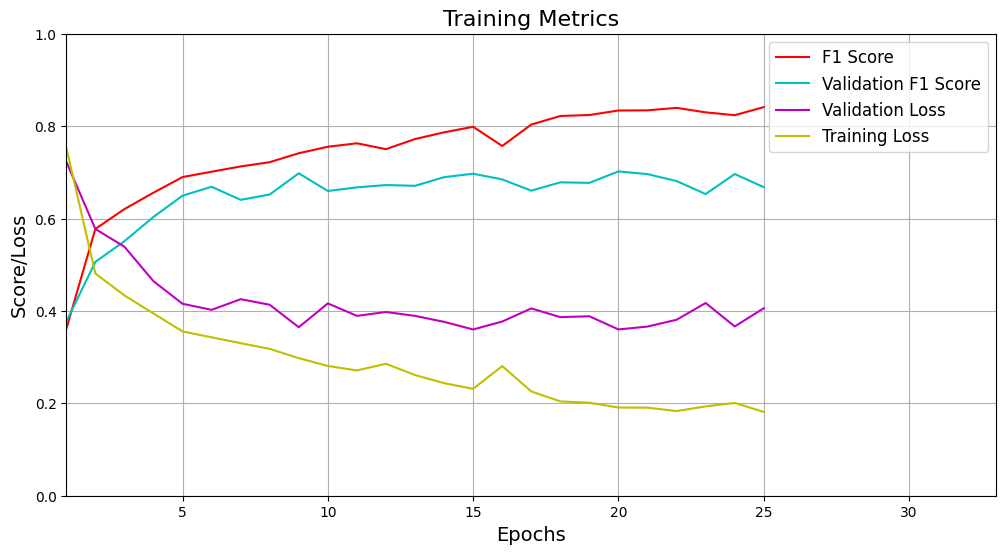

In [13]:
# Visualize the training history
plot_history(history, 33, 1)